# Question 4 (MM20B007)

### Importing required packages

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm

In [4]:
df = pd.read_csv('/content/drive/MyDrive/sem 7/ID5055/Assignment 2/q4 Gene_expression.csv')
df

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10
0,44.238570,46.327568,49.336706,49.930000,52.155010,56.082897,57.758317,45.890225,60.454725,51.591349
1,65.909395,57.122918,51.468609,52.995711,56.320355,54.214907,38.064228,62.533744,53.105279,55.364910
2,57.219155,59.881927,54.669539,51.552905,47.547845,38.944785,65.598596,55.011085,53.275810,57.249075
3,46.615968,61.673988,43.844661,61.296659,48.107037,55.137401,43.697487,61.932580,49.239911,51.808106
4,46.002237,56.666401,52.667228,57.554166,66.118988,57.574394,59.343295,55.084425,57.494767,56.698555
5,58.754421,61.233917,56.667768,56.664684,46.098282,58.861785,56.822221,58.651242,58.277109,49.212048
6,50.668883,54.414806,44.654714,40.298918,46.392419,46.404962,55.292177,64.875544,56.782074,45.168316
7,55.138678,62.839336,46.072974,57.633362,49.270153,50.046526,53.087044,64.555079,54.328780,60.789528
8,58.617063,66.785466,62.619731,50.624416,62.244634,46.770792,34.702778,73.110426,44.591585,52.684322
9,50.267081,56.076615,56.433327,48.701990,51.109332,57.528858,64.996836,57.595148,51.066236,47.478909


<ipython-input-5-3fac749752ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: title={'center': 'Data Distribution Histogram'}, ylabel='Density'>

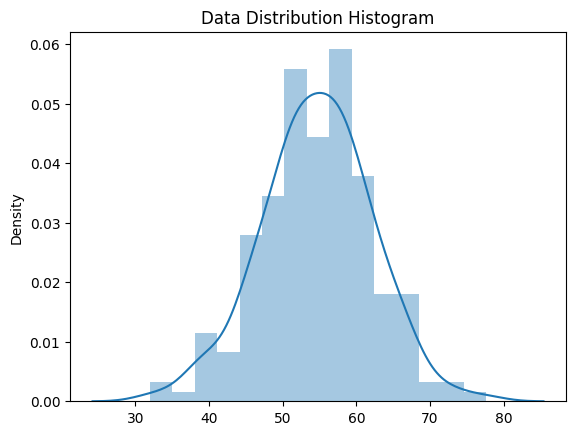

In [5]:
plt.title('Data Distribution Histogram')
sns.distplot(df)

### Assume the prior distribution of μ to be a normal distribution. You can take the sample mean of Day 1 samples and variance as prior parameters.

Given:

1. mean of the distribution $\mu_0$ = mean of the Day 1 samples

2. variance of the distribution $σ_0^2$ = variance of the Day 1 samples

In [6]:
day1 = df['Day 1']
mu_0 = np.mean(day1, axis = 0)
sigma_0 = np.std(day1, axis = 0)

print(f"mean of the prior distribution is {mu_0}")
print(f"stanadrd deviation of the prior distribution is {sigma_0}")

mean of the prior distribution is 53.0472556695
stanadrd deviation of the prior distribution is 8.826980817204479


### Estimate the posterior distribution of μ using samples from Day 1

Gene expression levels distribution is given by:

$
f(x; \mu, \sigma = 8) = \frac{1}{8\sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{128}\right)
$


The prior distribution is given by:

$
f(\mu; \mu_0, \sigma_0) = \frac{1}{\sigma_0\sqrt{2\pi}} \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)
$

where $\mu_0$ = 6.0337401566764175 and standard deviation $\sigma_0$ = 3.5503391410788043.

Estimated mu: 53.04723720260668


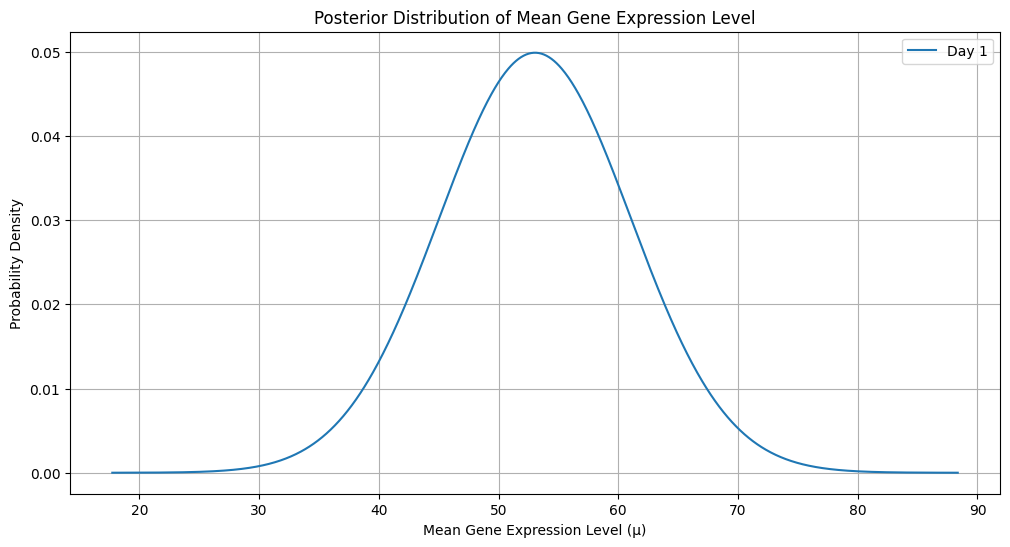

In [7]:
def map_log_likelihood(parameters, data, prior_mu, prior_std):
    mu = parameters
    if mu < 0:
        return np.inf
    log_likelihood = np.sum(np.log((1/(8*(2**0.5)*(np.pi)))*np.exp(-((data - mu)**2)/128))) + np.sum(np.log((1/(prior_std*(2**0.5)*(np.pi)))*np.exp(-((mu - prior_mu)**2)/(2*(prior_std**2)))))
    return -log_likelihood

initail_parameters = [1.0]

result = minimize(map_log_likelihood, initail_parameters, args = (df['Day 1'], mu_0, sigma_0))

# Estimated parameter
estimated_mu = result.x[0]
print("Estimated mu:", estimated_mu)

# Plot the probability distribution of the mean gene expression level each time after the update
plt.figure(figsize=(12, 6))
x = np.linspace(estimated_mu - 4*sigma_0, estimated_mu + 4*sigma_0, 1000)
y = norm.pdf(x, loc=estimated_mu, scale=8)
plt.plot(x, y, label=f'Day 1')

plt.xlabel('Mean Gene Expression Level (μ)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of Mean Gene Expression Level')
plt.legend()
plt.grid()
plt.show()

### Update the priors and repeat the process using data from each of the days. Plot the probability distribution of the mean of gene expression level each time after the update

### Using posterior of previous day as prior of the next next day.

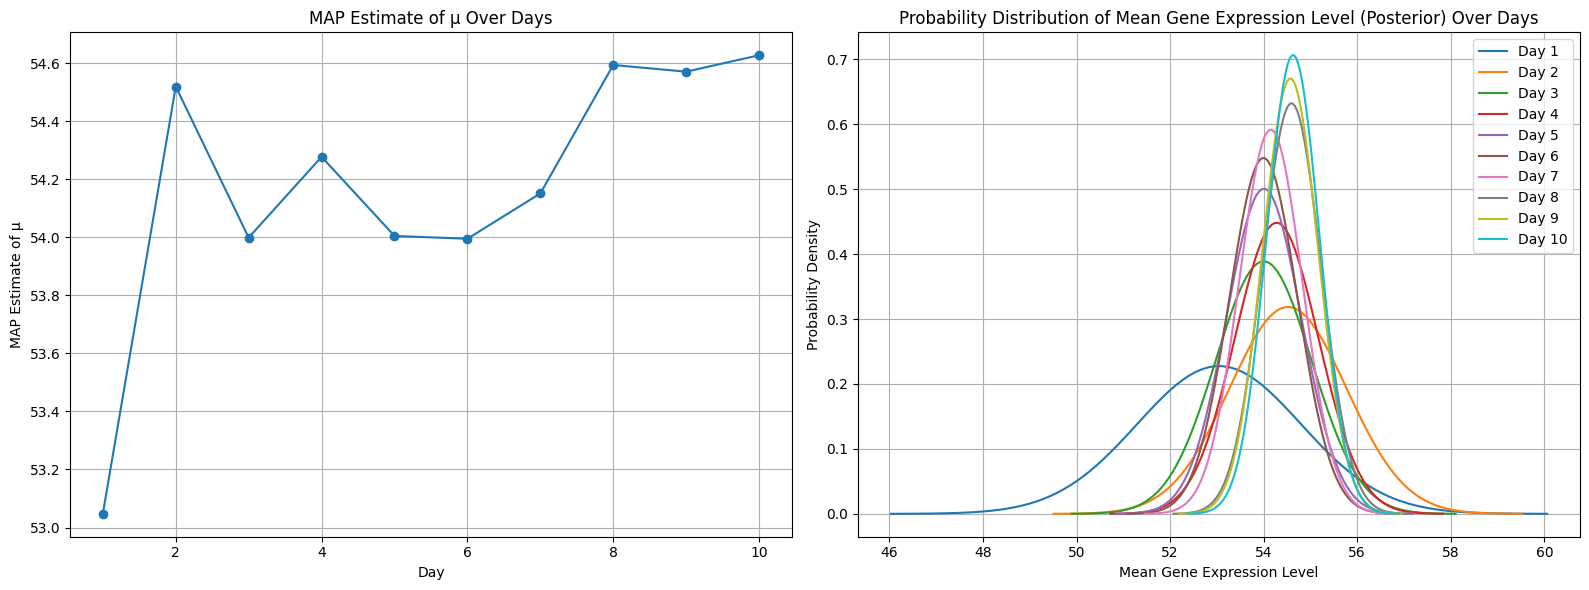

In [8]:
# Prior parameters (initialized using Day 1 data)
prior_mean = np.mean(df['Day 1'])
prior_variance = np.var(df['Day 1'])

# Lists to store MAP estimates and posterior parameters
map_estimates = []
posterior_means = [prior_mean]
posterior_variances = [prior_variance]

# Perform Bayesian estimation for each day
for i in range(10):
    # Update prior parameters based on the previous posterior
    prior_mean = posterior_means[-1]
    prior_variance = posterior_variances[-1]

    # Likelihood parameters (known standard deviation)
    likelihood_stddev = 8

    # Compute posterior parameters using Bayesian update
    posterior_variance = 1 / (1 / prior_variance + len(df['Day ' + str(i+1)]) / (likelihood_stddev**2))
    posterior_mean = (prior_mean / prior_variance + np.sum(df['Day ' + str(i+1)]) / (likelihood_stddev**2))/(len(df['Day ' + str(i+1)])/likelihood_stddev**2 + 1/prior_variance)

    # Calculate the MAP estimate for μ
    map_estimate = posterior_mean

    # Store posterior parameters and MAP estimate
    posterior_means.append(posterior_mean)
    posterior_variances.append(posterior_variance)
    map_estimates.append(map_estimate)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

days = np.arange(1, 11)
ax[0].plot(days, map_estimates, marker='o', linestyle='-')
ax[0].set_xlabel("Day")
ax[0].set_ylabel("MAP Estimate of μ")
ax[0].set_title("MAP Estimate of μ Over Days")
ax[0].grid(True)

days = np.arange(1, 11)
for i in range(1, 11):
    posterior_mean = posterior_means[i]
    posterior_variance = posterior_variances[i]
    posterior_stddev = np.sqrt(posterior_variance)

    x = np.linspace(posterior_mean - 4 * posterior_stddev, posterior_mean + 4 * posterior_stddev, 100)
    ax[1].plot(x, norm.pdf(x, posterior_mean, posterior_stddev), label=f'Day {i}')

ax[1].set_xlabel("Mean Gene Expression Level")
ax[1].set_ylabel("Probability Density")
ax[1].set_title("Probability Distribution of Mean Gene Expression Level (Posterior) Over Days")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()